In [1]:
library('RODBC')
library('quantmod')
library('PerformanceAnalytics')
library('Rlibeemd')
source("/usr/common/config.R")
lcon <- odbcDriverConnect(sprintf("Driver={SQL Server};Server=%s;Database=%s;Uid=%s;Pwd=%s;", ldbserver, ldbname, ldbuser, ldbpassword), case = "nochange", believeNRows = TRUE)


Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend



In [2]:
startDate<-as.Date("1997-01-01")
indexName<-'NIFTY 50'

prices<-sqlQuery(lcon, sprintf("select TIME_STAMP, PX_CLOSE from BHAV_INDEX
                                    where TIME_STAMP >='%s'
                                    and INDEX_NAME='%s'", startDate, indexName))

pXts<-xts(prices[,2], as.Date(prices[,1]))

## price decomposition

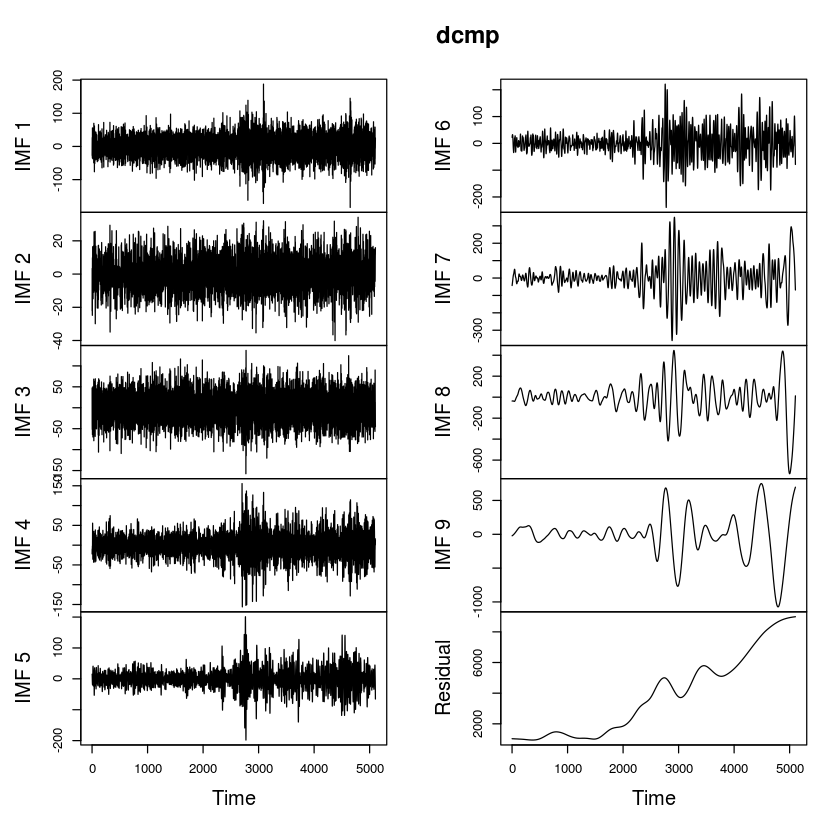

In [4]:
dcmp<-ceemdan(pXts, num_imfs=10)
plot(dcmp)

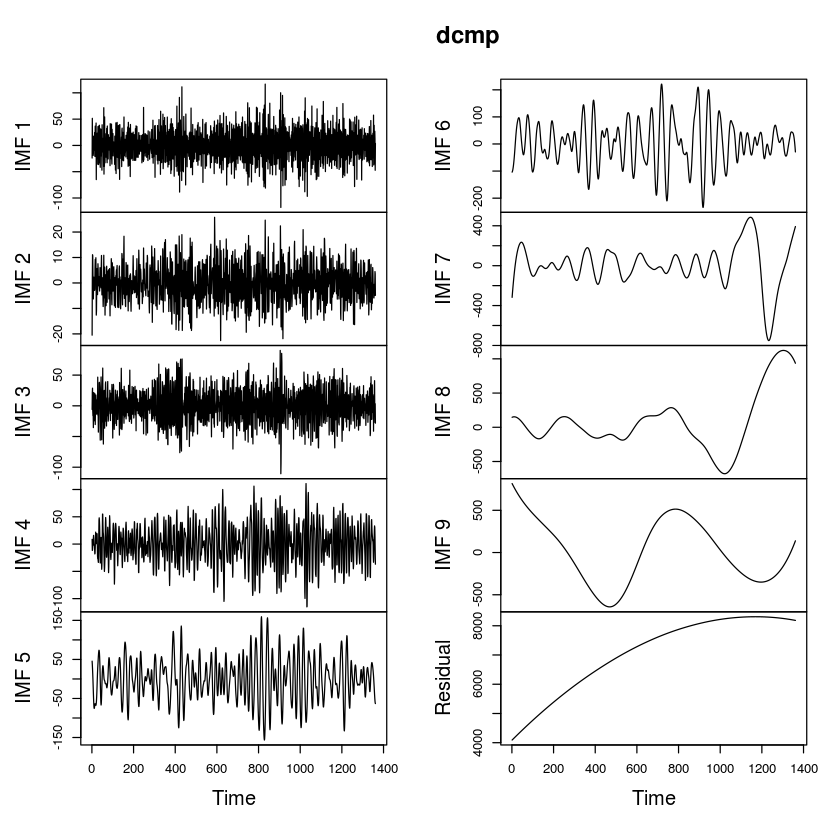

In [5]:
dcmp<-ceemdan(pXts['2012/'], num_imfs=10)
plot(dcmp)

## log(price) decomposition

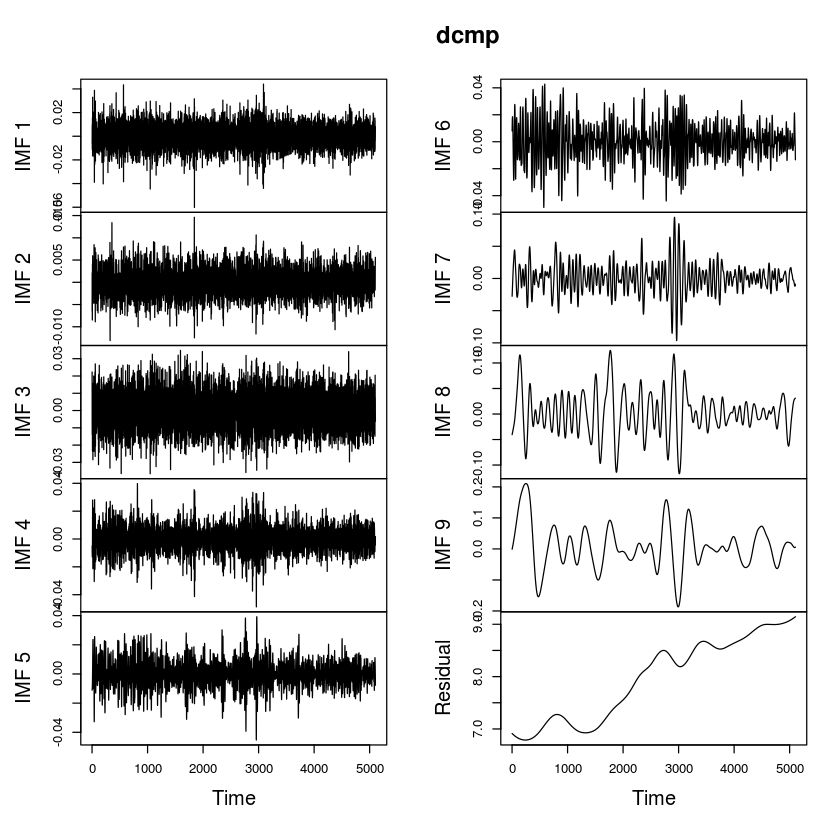

In [6]:
dcmp<-ceemdan(log(pXts), num_imfs=10)
plot(dcmp)

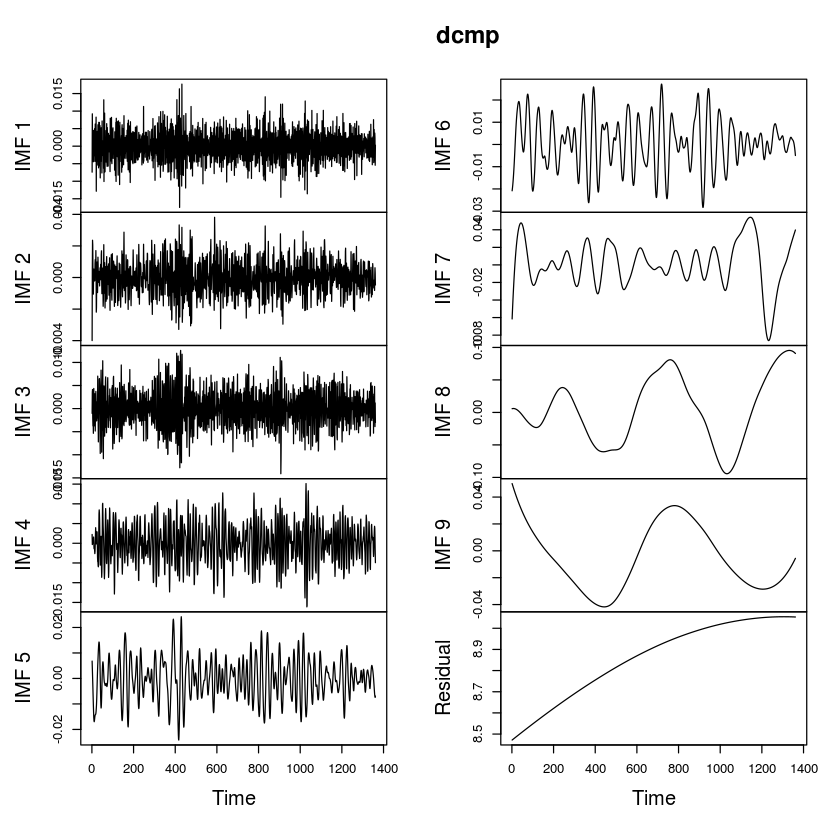

In [7]:
dcmp<-ceemdan(log(pXts['2012/']), num_imfs=10)
plot(dcmp)

## daily return decomposition

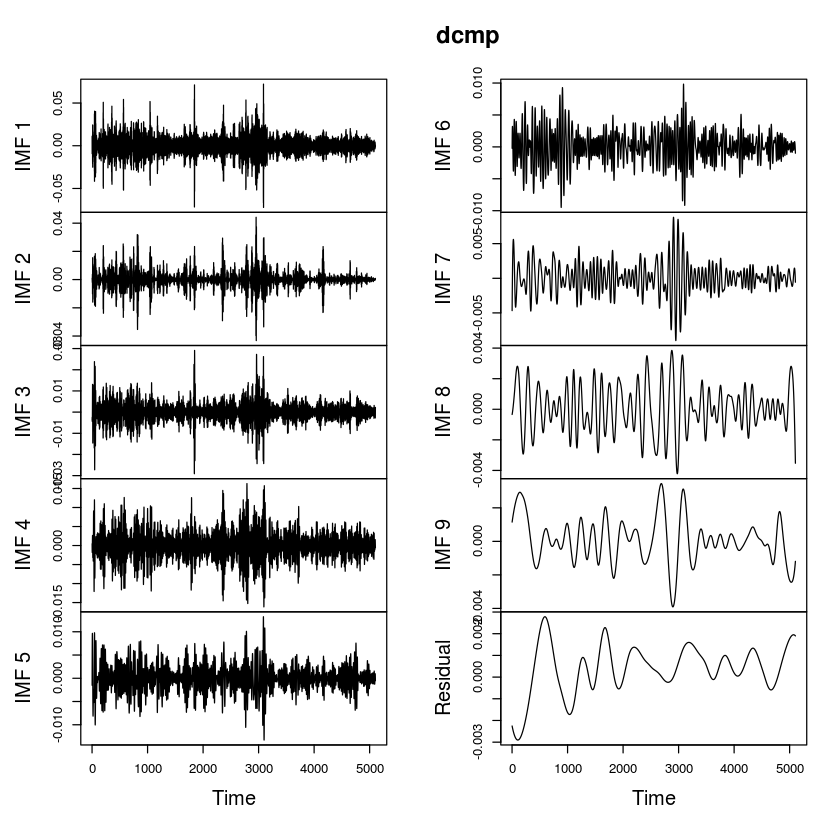

In [8]:
dcmp<-ceemdan(dailyReturn(pXts), num_imfs=10)
plot(dcmp)

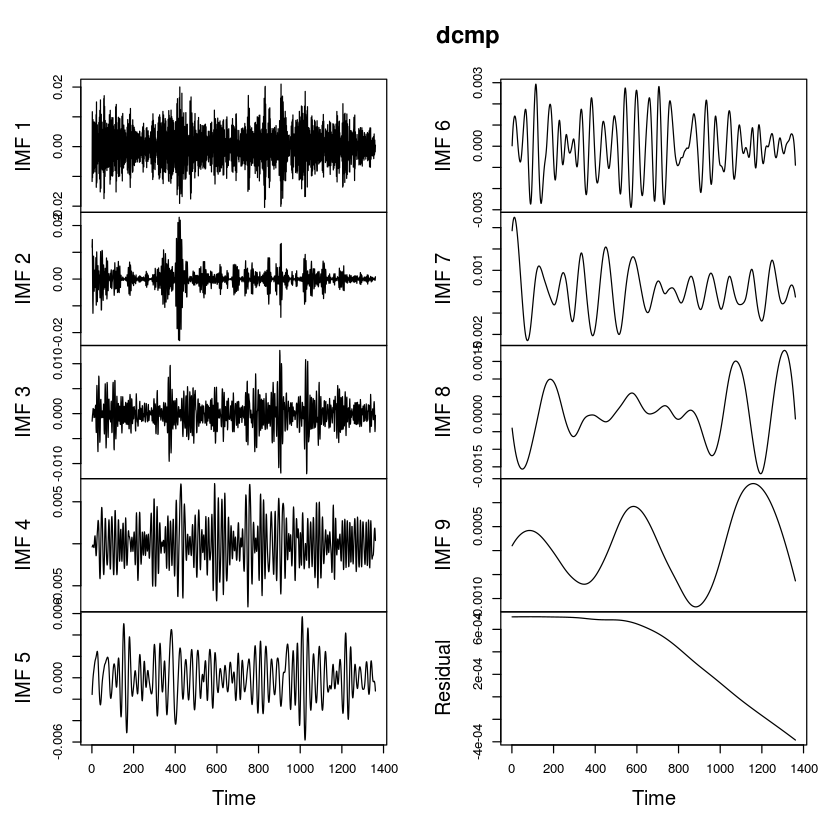

In [9]:
dcmp<-ceemdan(dailyReturn(pXts['2012/']), num_imfs=10)
plot(dcmp)

## 5-day rolling return decomposition

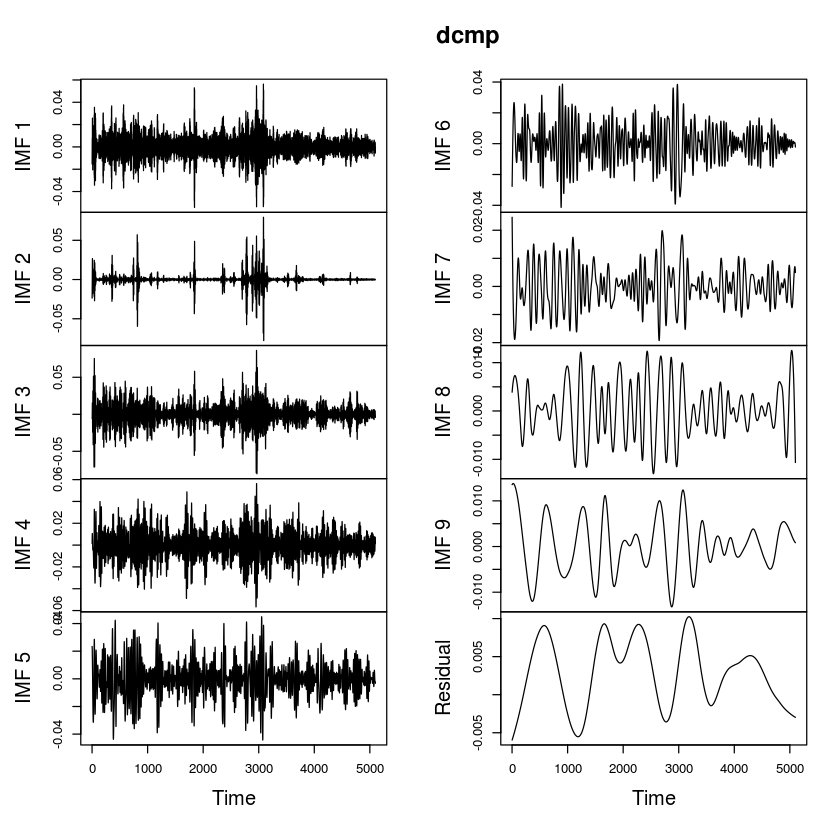

In [10]:
dcmp<-ceemdan(na.omit(rollapply(dailyReturn(pXts), 5, Return.cumulative)), num_imfs=10)
plot(dcmp)

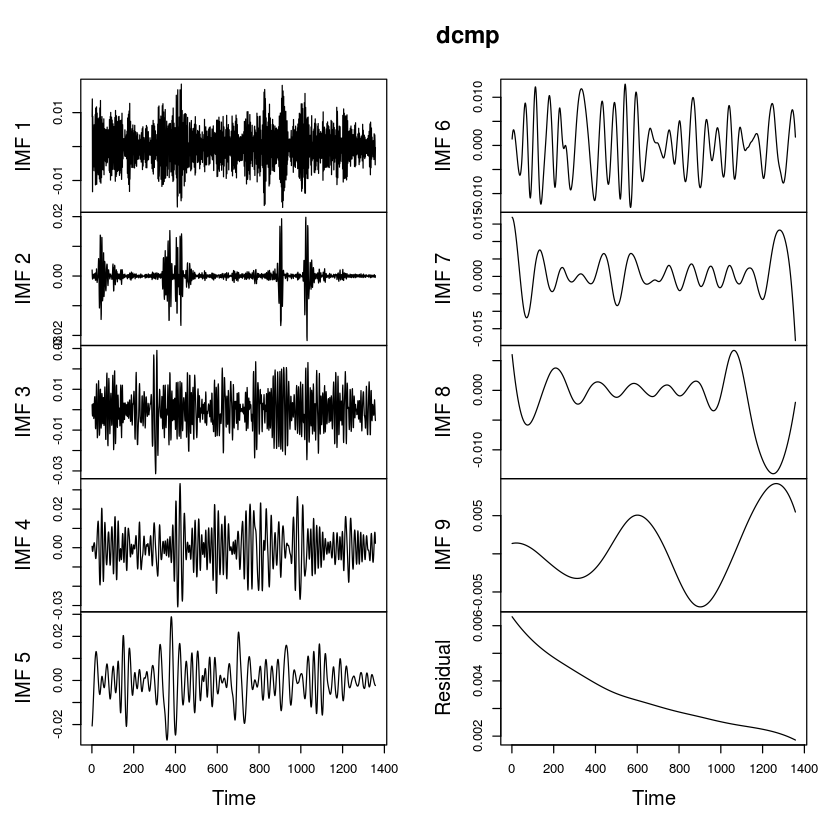

In [12]:
dcmp<-ceemdan(na.omit(rollapply(dailyReturn(pXts['2012/']), 5, Return.cumulative)), num_imfs=10)
plot(dcmp)

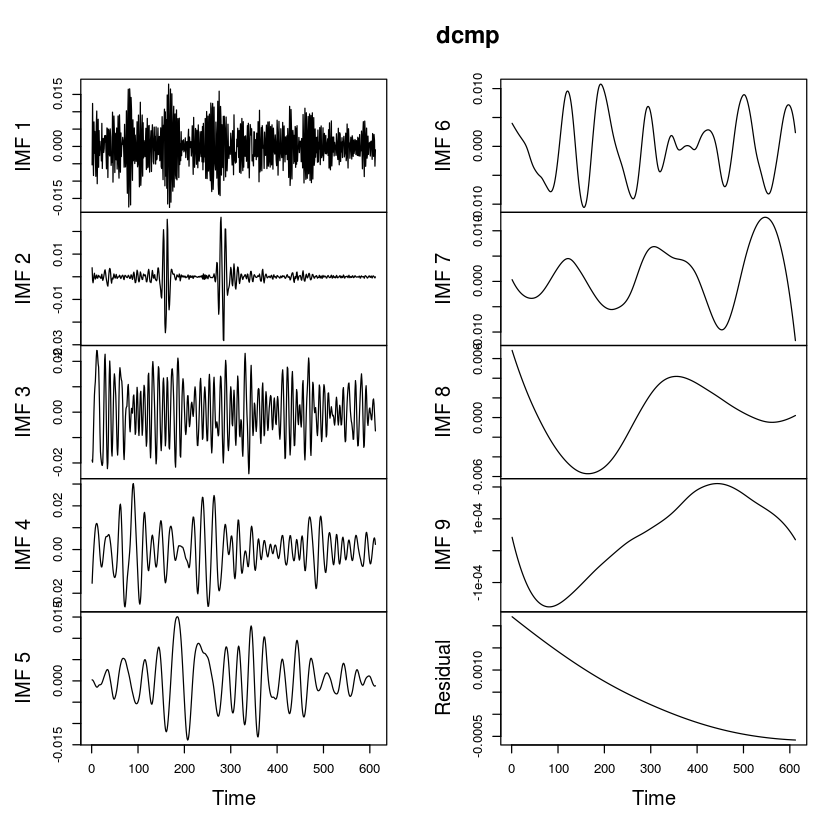

In [13]:
dcmp<-ceemdan(na.omit(rollapply(dailyReturn(pXts['2015/']), 5, Return.cumulative)), num_imfs=10)
plot(dcmp)

## 20-day rolling return decomposition

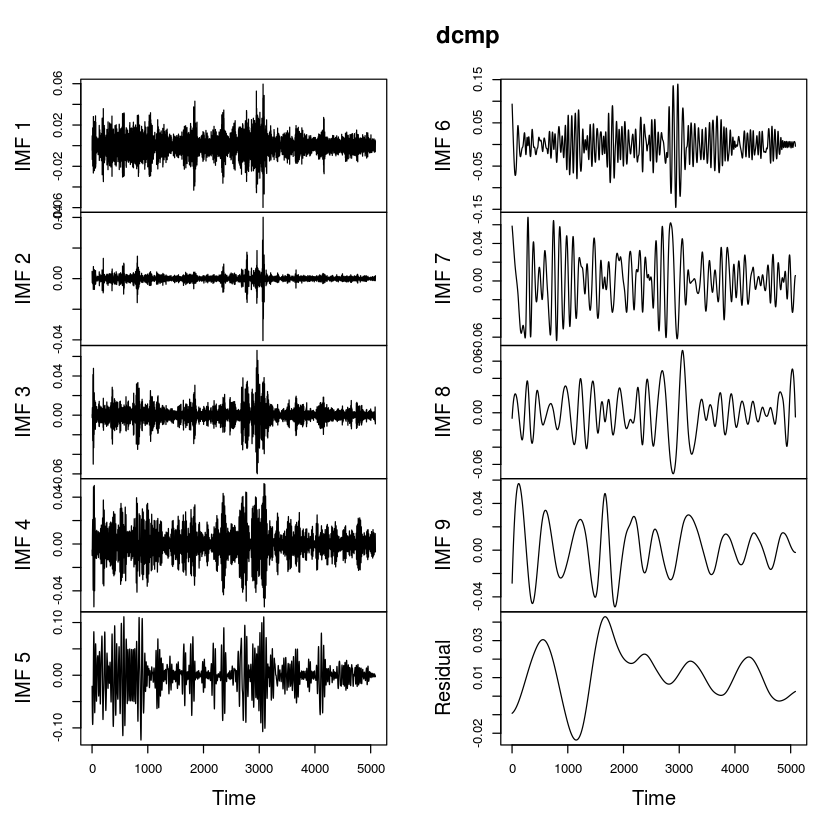

In [14]:
dcmp<-ceemdan(na.omit(rollapply(dailyReturn(pXts), 20, Return.cumulative)), num_imfs=10)
plot(dcmp)